In [1]:
from agents import ConsumerProducer, Influencer, ImperfectConsumerProducer
from content_market import ContentMarket
import numpy as np
from stats import TestStats

In [2]:
num_influencers = 1
num_consumer_producers = 15

production_rate = 1
external_production_rate = 1

topics = [[-1, 1]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, production_rate, external_production_rate)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
agent_colors = dict()

for i in range(num_consumer_producers):
    cons_func = lambda x: inverse_decay(x, 1, 2)
    prod_func = lambda x: inverse_decay(x, 1, 2)
    consumer_producer = ConsumerProducer(prod_func, cons_func, 20, 3, 1, init_following_rates_method='equal')
    #consumer_producer = ImperfectConsumerProducer(prod_func, cons_func, 10, 3, 1, init_following_rates_method='equal')
    content_market.add_agent(consumer_producer)

    color = np.random.rand(3,)
    agent_colors[consumer_producer.index] = color

for i in range(num_influencers):
    influencer = Influencer(40, 1, init_following_rates_method='equal')
    content_market.add_agent(influencer)

    color = np.random.rand(3,)
    agent_colors[influencer.index] = color

In [6]:
import matplotlib.pyplot as plt
import visualize

In [7]:
content_market.finalize(method='even')

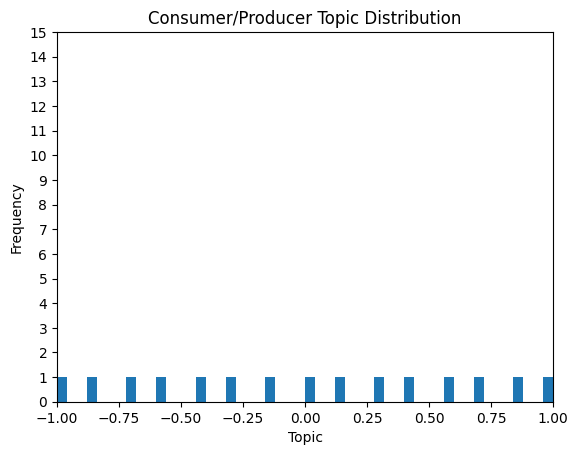

In [8]:
visualize.plot_topic_distribution_histogram("Consumer/Producer Topic Distribution", content_market.consumers, -1, 1)

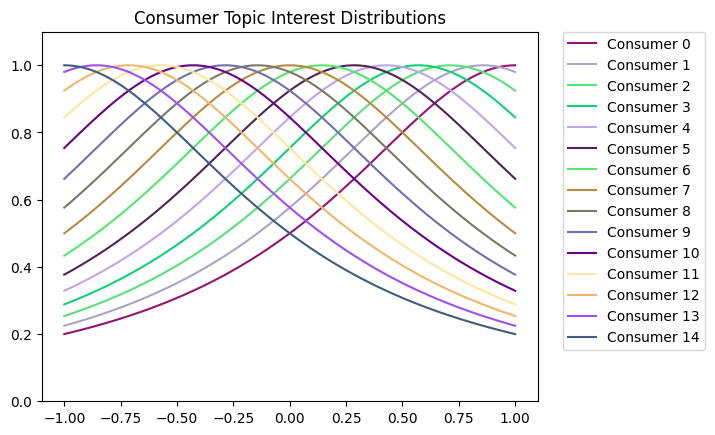

In [9]:
visualize.plot_consumer_topic_interest_distributions("Consumer Topic Interest Distributions", content_market.consumers, -1, 1, agent_colors)

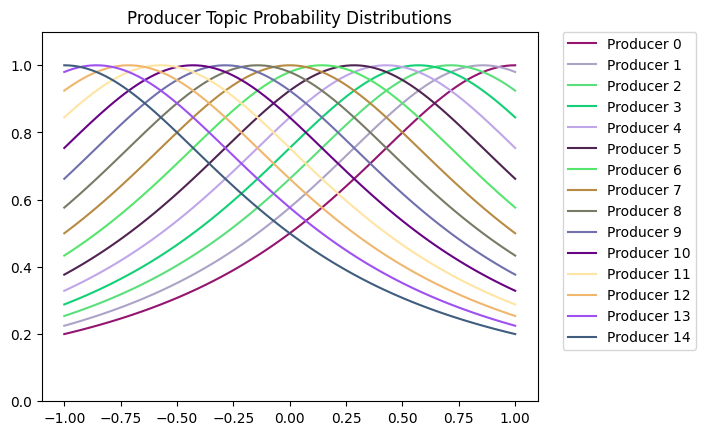

In [10]:
visualize.plot_producer_topic_probability_distributions("Producer Topic Probability Distributions", content_market.producers, -1, 1, agent_colors)

In [11]:
stats: TestStats = content_market.optimize(100)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing consumer 12
Optimizing consumer 13
Optimizing consumer 14
Optimizing influencer 15
Optimizing producer 0
Optimization succeeded (overall 0.010414791060611606s): nit=4, nfev=12, njev=6.
Optimizing producer 1
Optimization succeeded (overall 0.007698416942730546s): nit=4, nfev=12, njev=6.
Optimizing producer 2
Optimization succeeded (overall 0.006330791162326932s): nit=4, nfev=12, njev=6.
Optimizing producer 3
Optimization succeeded (overall 0.00599074992351234s): nit=4, nfev=12, njev=6.
Optimizing producer 4
Optimization succeeded (overall 0.006281333044171333s): nit=4, nfev=12, njev=6.
Optimizing producer 5
Optimization succeeded (overall 0.005002250196412206s): nit=3, nfev=10, njev=5.
Optimizing producer 6
Optimiz

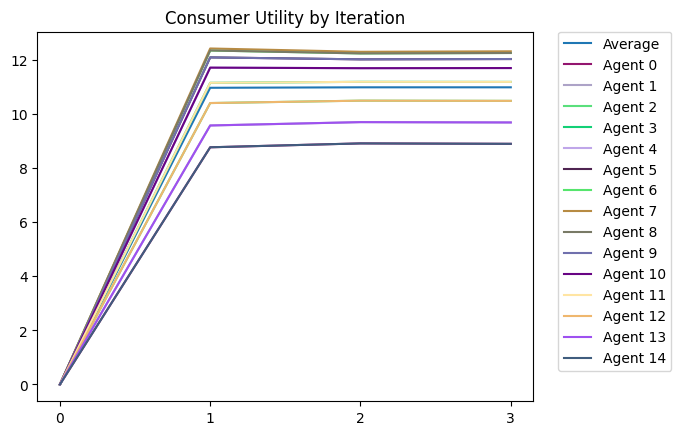

In [12]:
visualize.plot_agent_utility_by_iteration("Consumer Utility by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility)

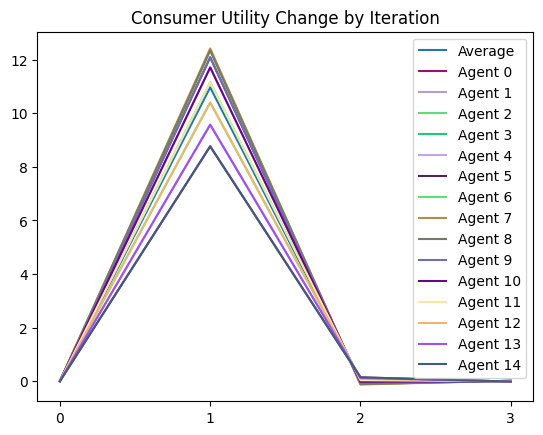

In [13]:
visualize.plot_agent_utility_change_by_iteration("Consumer Utility Change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility_change)

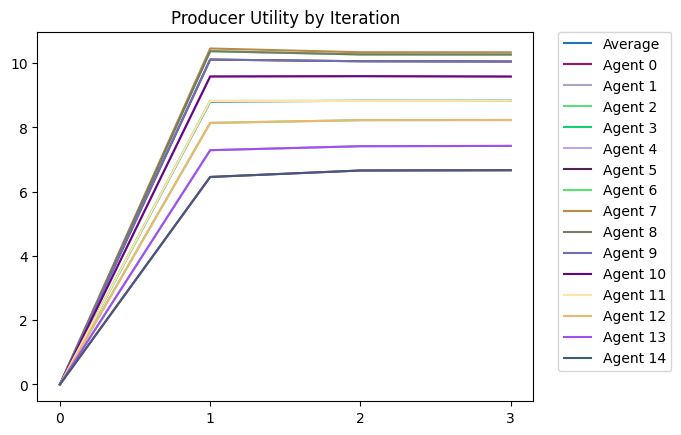

In [14]:
visualize.plot_agent_utility_by_iteration("Producer Utility by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility)

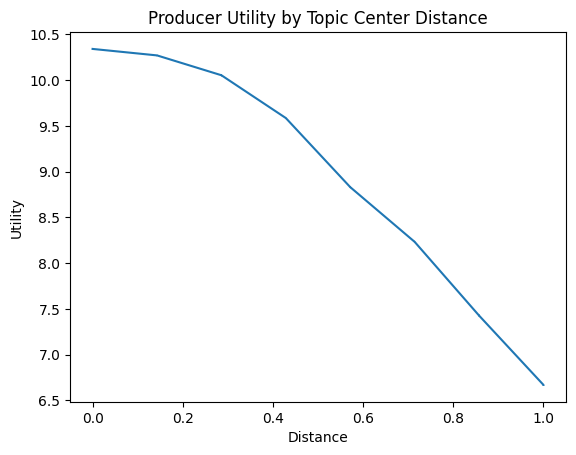

In [15]:
plt.figure()
plt.title('Producer Utility by Topic Center Distance')
topic_center = [(content_market.topics_bounds[i][0] + content_market.topics_bounds[i][1]) / 2 for i in range(len(content_market.topics_bounds))]
distances = []
utilities = []
for producer in sorted(content_market.producers, key=lambda x: np.linalg.norm(x.main_interest - topic_center)):
    main_interest = producer.main_interest
    distance = np.linalg.norm(main_interest - topic_center)
    distances.append(distance)
    utilities.append(stats.producer_stats[producer.index].utilities[-1])
plt.plot(distances, utilities)
plt.xlabel('Distance')
plt.ylabel('Utility')
plt.show()

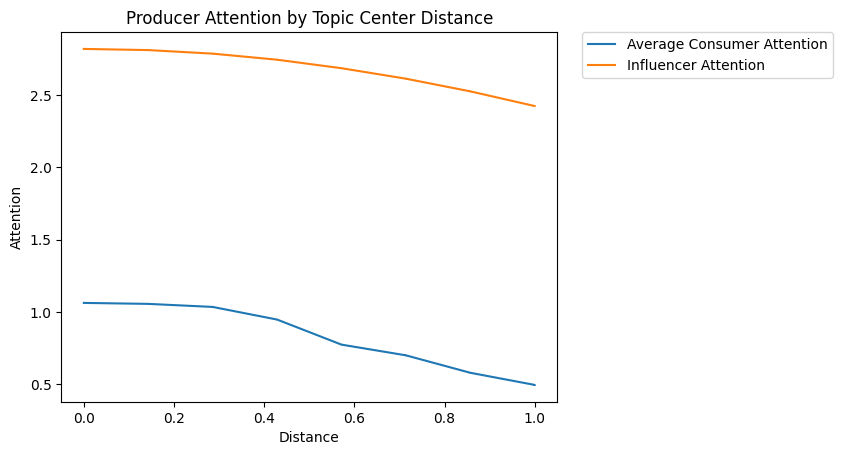

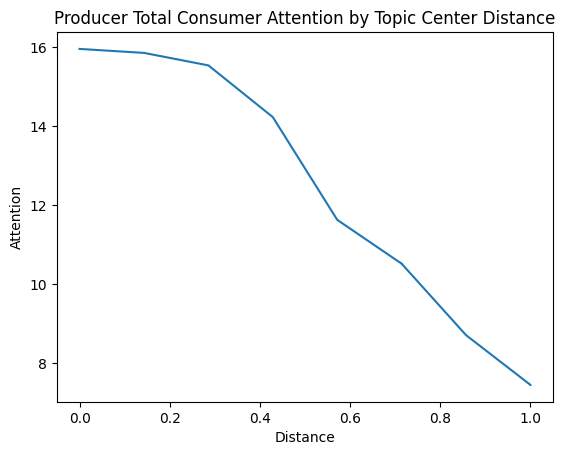

In [16]:

topic_center = [(content_market.topics_bounds[i][0] + content_market.topics_bounds[i][1]) / 2 for i in range(len(content_market.topics_bounds))]
distances = []
avg_consumer_attentions = []
total_consumer_attentions = []
influencer_attentions = []
for producer in sorted(content_market.producers, key=lambda x: np.linalg.norm(x.main_interest - topic_center)):
    main_interest = producer.main_interest
    distance = np.linalg.norm(main_interest - topic_center)
    distances.append(distance)
    influencer_attentions.append(stats.influencer_stats[content_market.influencers[0].index].following_rates[-1][producer.index])
    consumer_attn = 0
    for consumer in content_market.consumers:
        consumer_attn += stats.consumer_stats[consumer.index].following_rates[-1][producer.index]
    avg_consumer_attentions.append(consumer_attn / len(content_market.consumers))
    total_consumer_attentions.append(consumer_attn)
plt.figure()
plt.title('Producer Attention by Topic Center Distance')
plt.plot(distances, avg_consumer_attentions, label='Average Consumer Attention')
plt.plot(distances, influencer_attentions, label='Influencer Attention')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Distance')
plt.ylabel('Attention')
plt.show()

plt.figure()
plt.title('Producer Total Consumer Attention by Topic Center Distance')
plt.plot(distances, total_consumer_attentions, label='Total Consumer Attention')
plt.xlabel('Distance')
plt.ylabel('Attention')
plt.show()

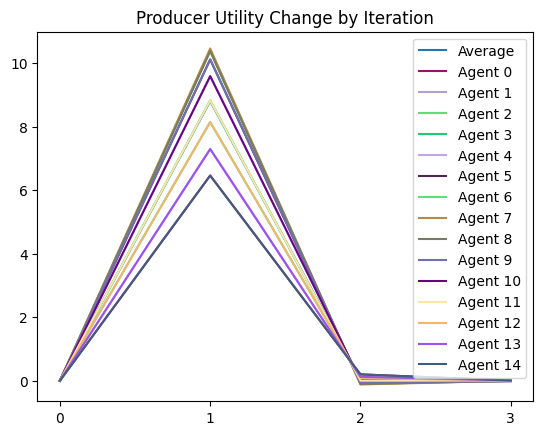

In [17]:
visualize.plot_agent_utility_change_by_iteration("Producer Utility Change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility_change)

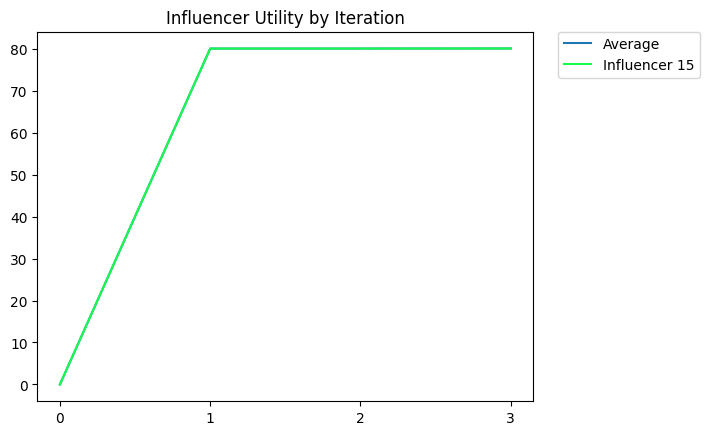

In [18]:
visualize.plot_agent_utility_by_iteration("Influencer Utility by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_utility)

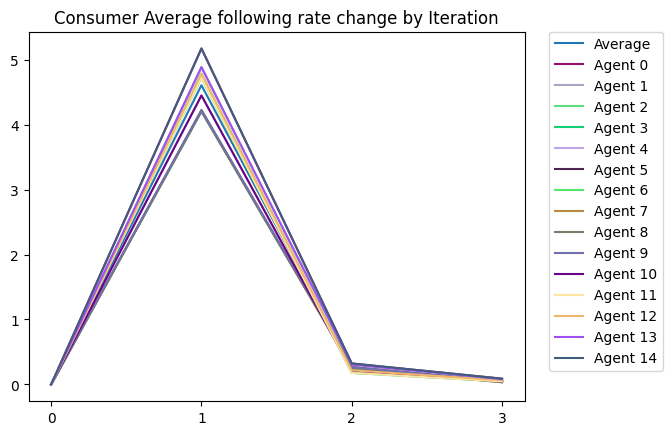

In [19]:
visualize.plot_following_rate_change_by_iteration("Consumer Average following rate change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_rate_change)

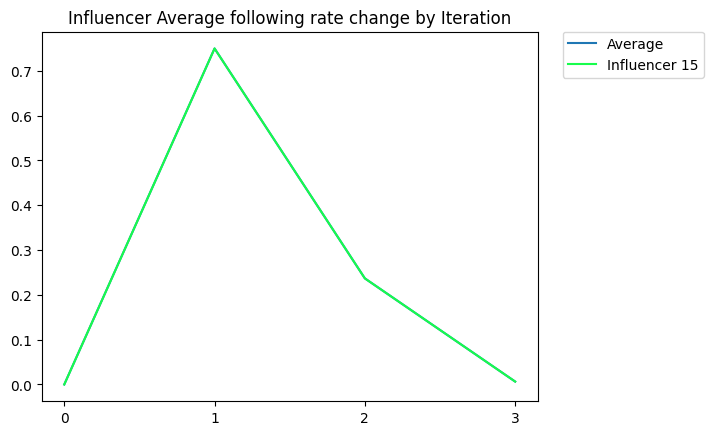

In [20]:
visualize.plot_following_rate_change_by_iteration("Influencer Average following rate change by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_rate_change)

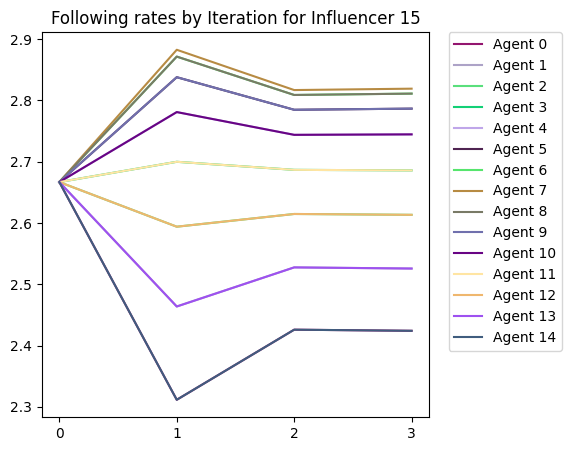

In [21]:
visualize.plot_following_rates_by_iteration(content_market.influencers, content_market.producers, agent_colors, stats.influencer_stats)

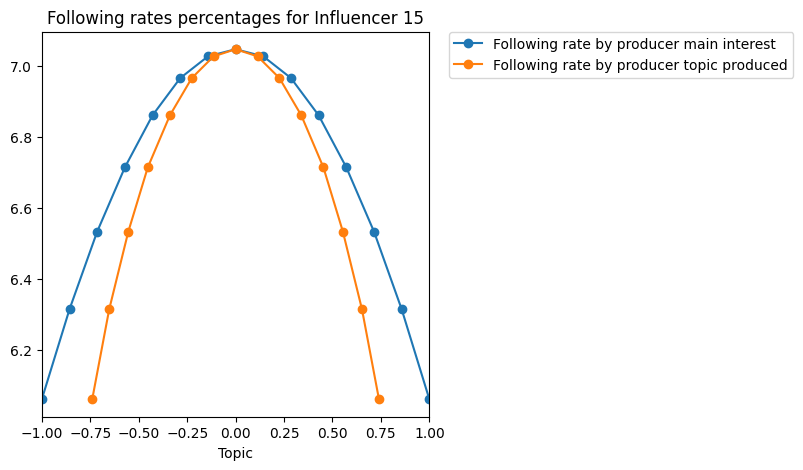

In [22]:
visualize.plot_agent_following_rates(content_market.influencers, stats.influencer_stats, agent_colors)

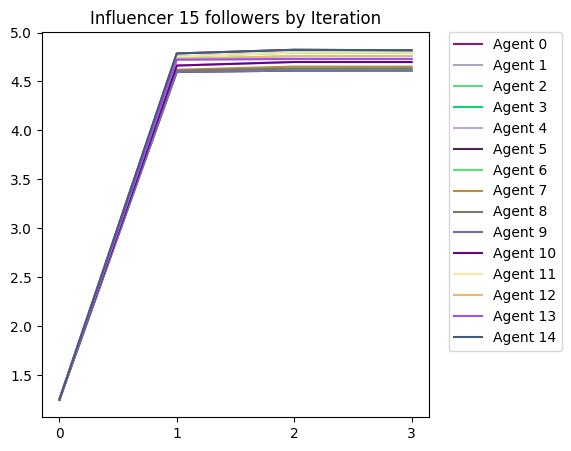

In [23]:
visualize.plot_follows_by_iteration(content_market.influencers, content_market.consumers, agent_colors, stats.consumer_stats)

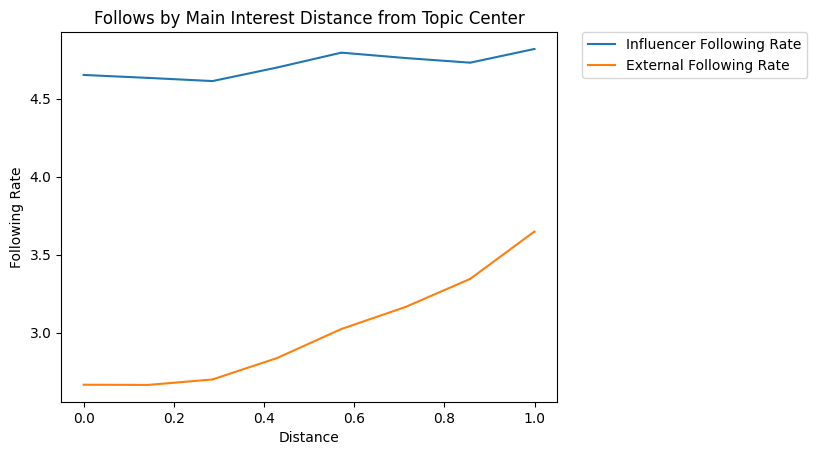

In [24]:
plt.figure()
plt.title('Follows by Main Interest Distance from Topic Center')
topic_center = [(content_market.topics_bounds[i][0] + content_market.topics_bounds[i][1]) / 2 for i in range(len(content_market.topics_bounds))]
distances = []
influencer_rates = []
#closest_producer_rates = []
external_rates = []
for consumer in sorted(content_market.consumers, key=lambda x: np.linalg.norm(x.main_interest - topic_center)):
    main_interest = consumer.main_interest
    distance = np.linalg.norm(main_interest - topic_center)
    distances.append(distance)
    influencer_rates.append(stats.consumer_stats[consumer.index].following_rates[-1][content_market.influencers[0].index])
    external_rates.append(stats.consumer_stats[consumer.index].following_rates[-1][-1])

    # closest_producer = sorted(content_market.producers, key=lambda x: np.linalg.norm(main_interest - x.main_interest))[0]
    # closest_producer_rates.append(stats.consumer_stats[consumer.index].following_rates[-1][closest_producer.index])
plt.plot(distances, influencer_rates, label='Influencer Following Rate')
plt.plot(distances, external_rates, label='External Following Rate')
#plt.plot(distances, closest_producer_rates, label='Closest Producer Following Rate')
plt.xlabel('Distance')
plt.ylabel('Following Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

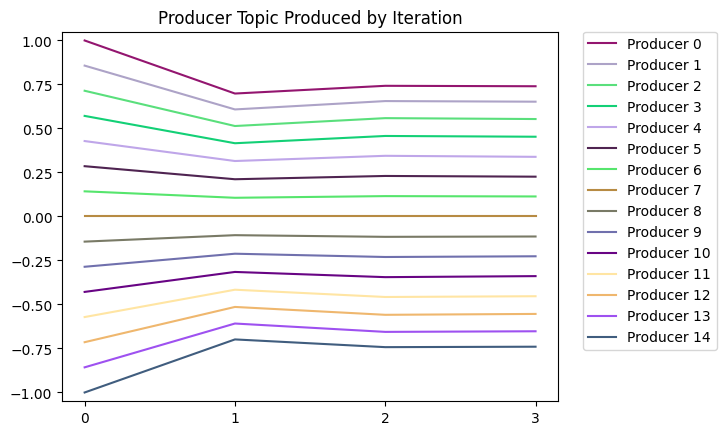

In [25]:
visualize.plot_producer_topic_produced_by_iteration("Producer Topic Produced by Iteration", content_market.producers, content_market.consumers, agent_colors, stats.producer_stats, False)

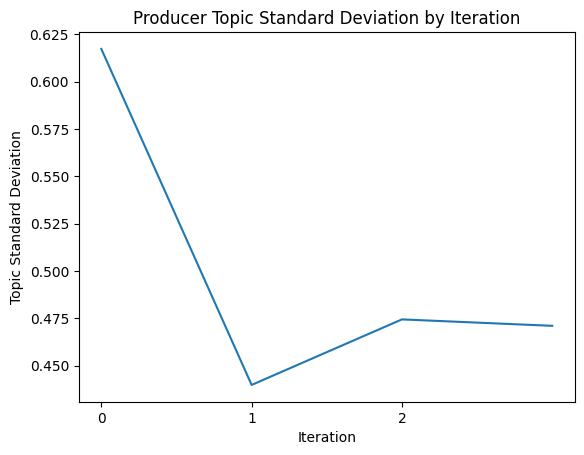

In [26]:
visualize.plot_value_by_iteration("Producer Topic Standard Deviation by Iteration", stats, "producer_topic_standard_deviation", "Topic Standard Deviation")

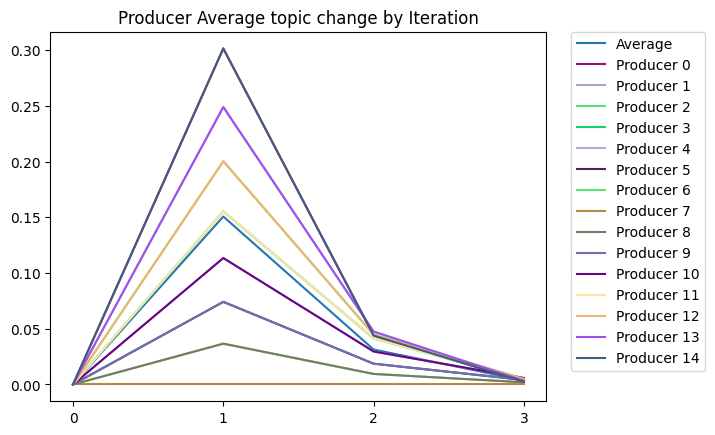

In [27]:
visualize.plot_producer_topic_change_by_iteration("Producer Average topic change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_change)

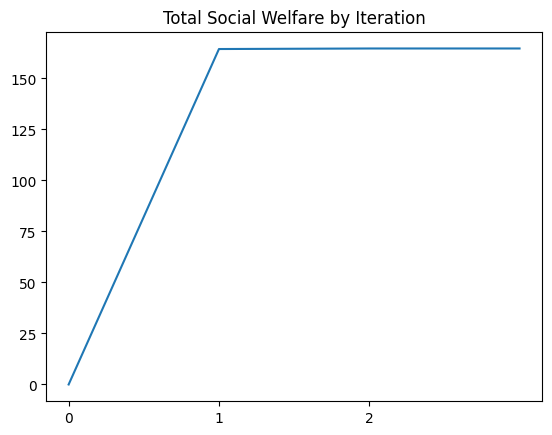

In [28]:
visualize.plot_total_social_welfare_by_iteration("Total Social Welfare by Iteration", stats)

In [52]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

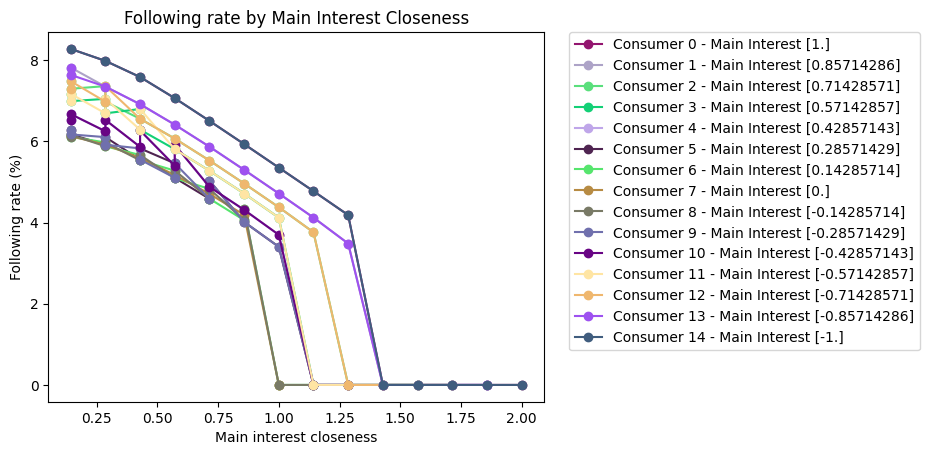

In [53]:
visualize.plot_following_rate_by_main_interest_closeness("Following rate by Main Interest Closeness", content_market.consumers, content_market.producers, agent_colors, stats.consumer_stats)

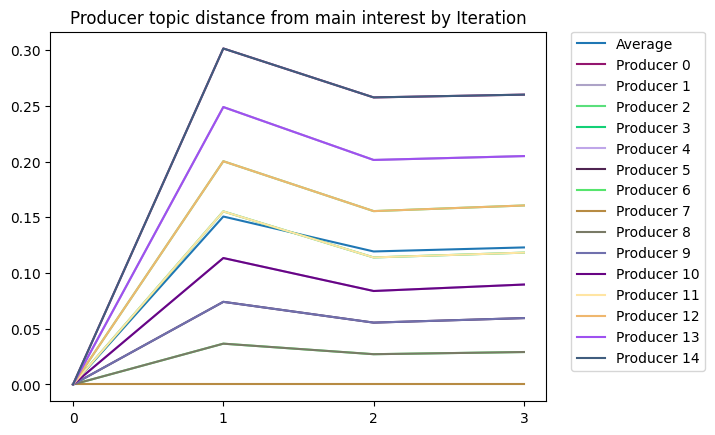

In [31]:
visualize.plot_producer_topic_distance_from_main_interest_by_iteration("Producer topic distance from main interest by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_distance_from_main_interest)

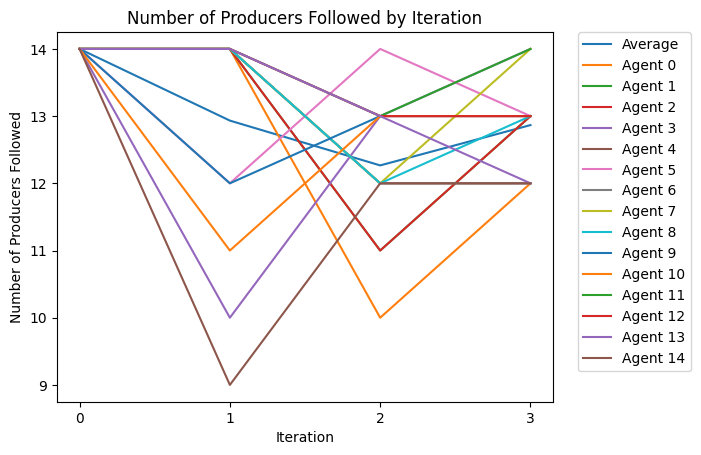

In [32]:
visualize.plot_value_by_agent_by_iteration("Number of Producers Followed by Iteration", stats.consumer_stats, "num_producers_followed", "Number of Producers Followed", stats.average_consumer_num_producers_followed)

[[ 1.         -0.36434277]
 [-0.36434277  1.        ]]


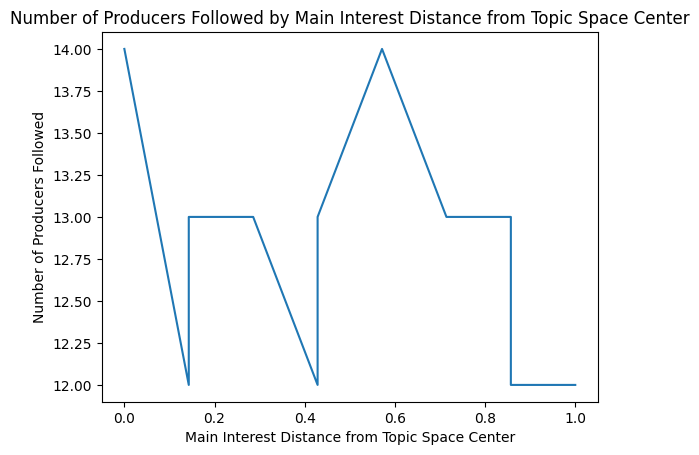

In [43]:
num_prods_by_main_interest_magnitude = []
topic_center = np.array([(bound[0] + bound[1]) / 2 for bound in content_market.topics_bounds])

for consumer in content_market.consumers:
    main_interest_mag = np.linalg.norm(consumer.main_interest - topic_center)
    num_prods_by_main_interest_magnitude.append((main_interest_mag, stats.consumer_stats[consumer.index].num_producers_followed[-1]))

num_prods_by_main_interest_magnitude.sort(key=lambda x: x[0])
print(np.corrcoef([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude]))
plt.figure()
plt.plot([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude])
plt.xlabel("Main Interest Distance from Topic Space Center")
plt.ylabel("Number of Producers Followed")
plt.title("Number of Producers Followed by Main Interest Distance from Topic Space Center")
plt.show()

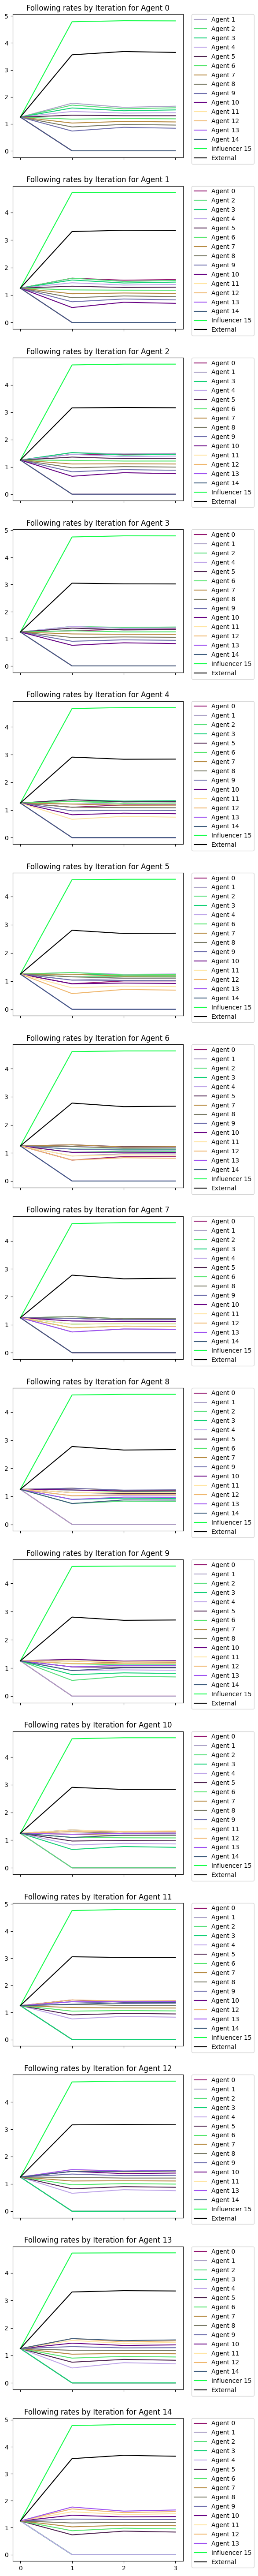

In [34]:
visualize.plot_following_rates_by_iteration(content_market.consumers, sorted(list(set(content_market.producers + content_market.influencers)), key=lambda x: x.index), agent_colors, stats.consumer_stats)

In [35]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

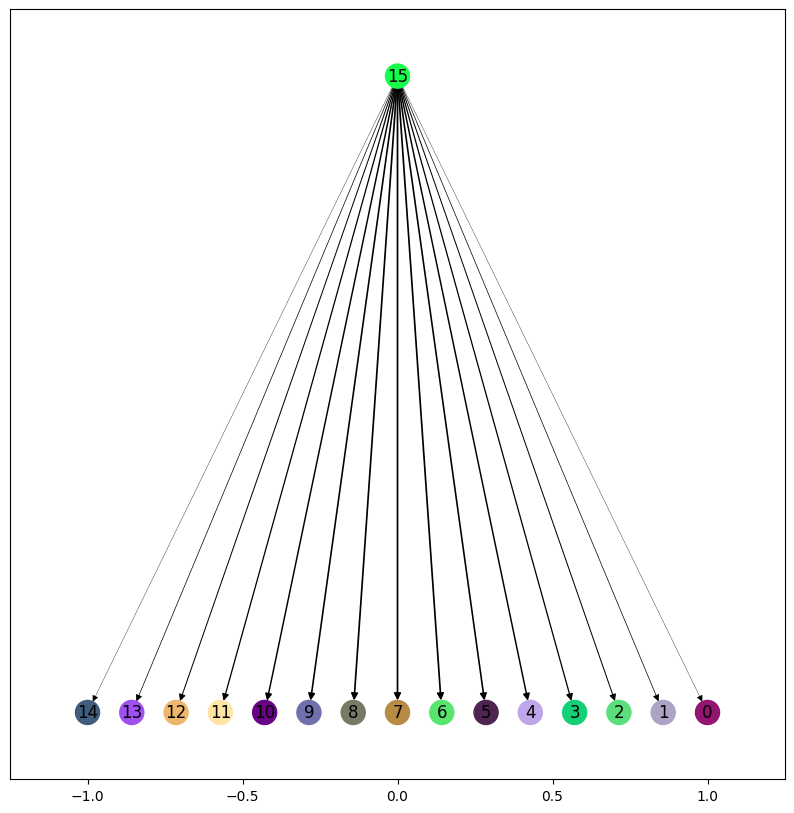

In [36]:
visualize.visualize_influencer(content_market, stats.influencer_stats[content_market.influencers[0].index], agent_colors)

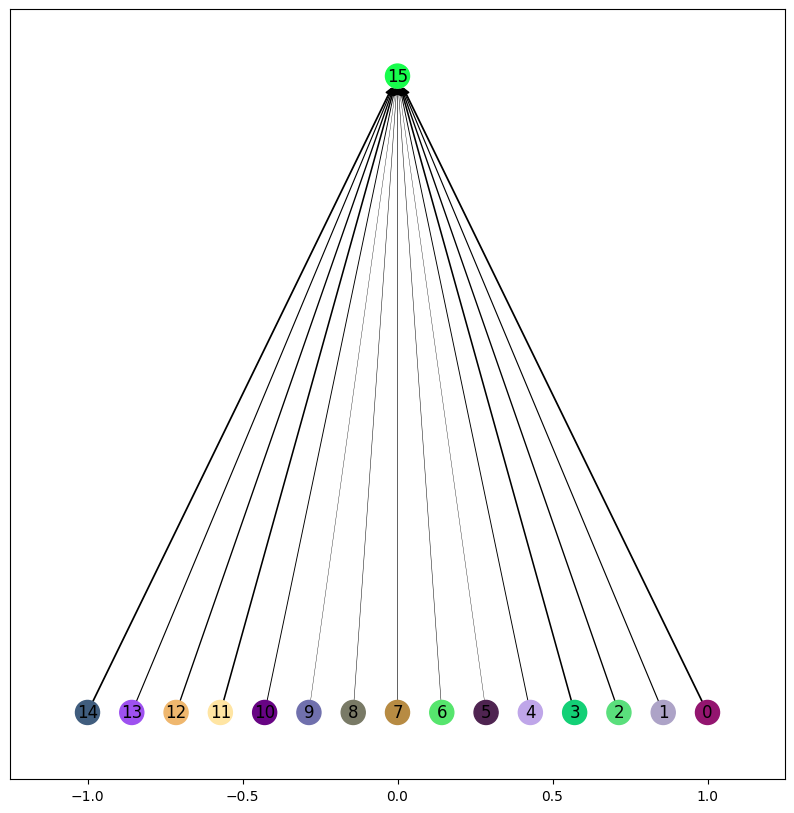

In [37]:
visualize.visualize_influencer_followers(content_market, stats.consumer_stats, agent_colors)

{0: (1.0, 0), 1: (0.857142857142857, 0), 2: (0.7142857142857142, 0), 3: (0.5714285714285714, 0), 4: (0.4285714285714284, 0), 5: (0.2857142857142856, 0), 6: (0.1428571428571428, 0), 7: (0.0, 0), 8: (-0.1428571428571429, 0), 9: (-0.2857142857142858, 0), 10: (-0.4285714285714286, 0), 11: (-0.5714285714285714, 0), 12: (-0.7142857142857143, 0), 13: (-0.8571428571428572, 0), 14: (-1.0, 0), 15: (0, 1), 'External': (1, 1)}


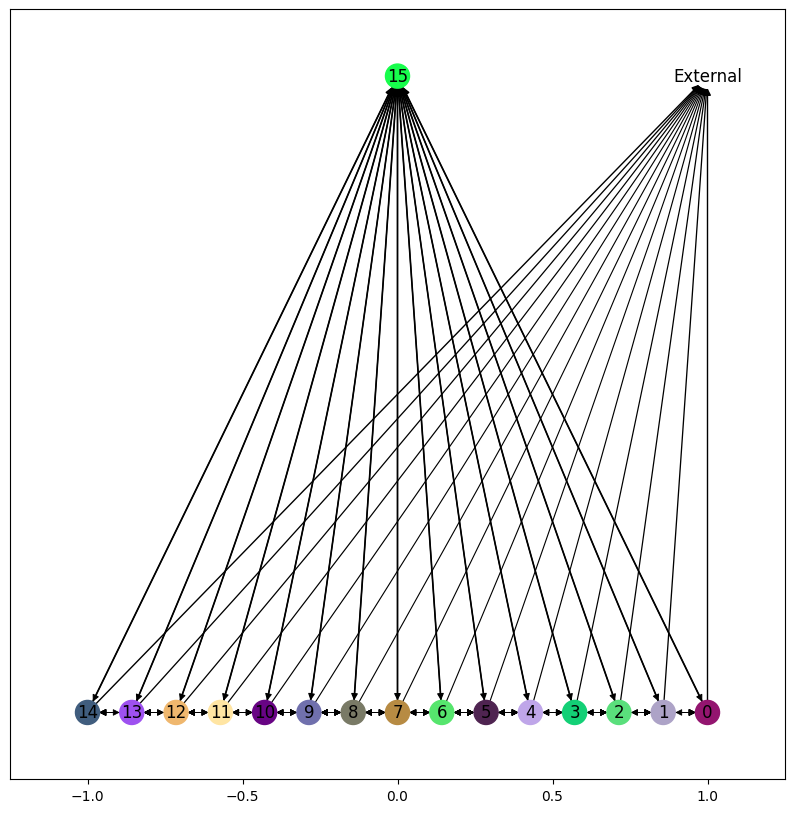

In [38]:
visualize.visualize_market(content_market, stats, agent_colors)

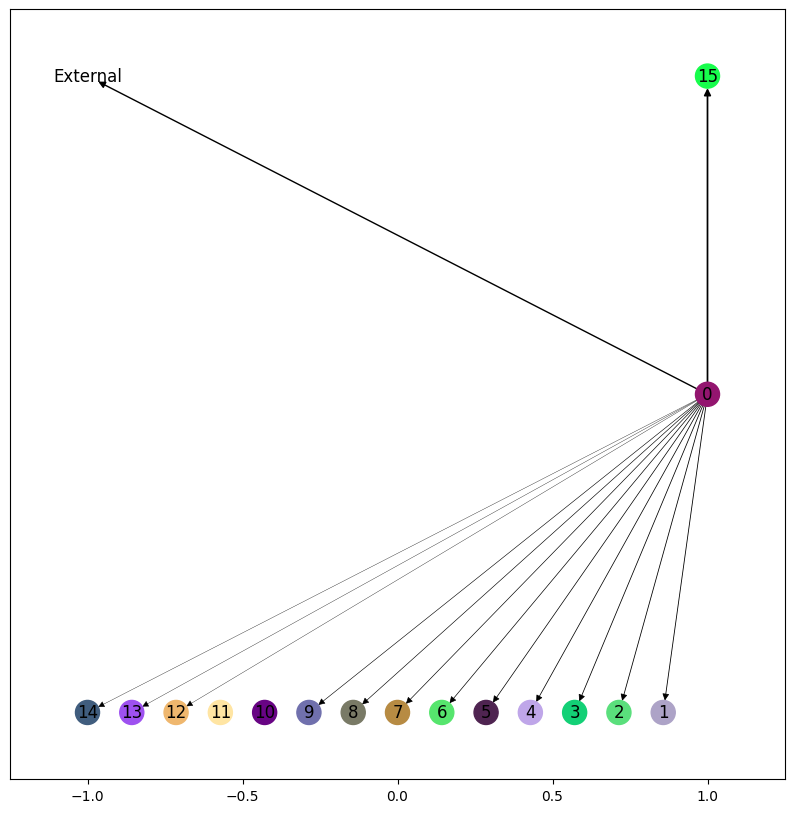

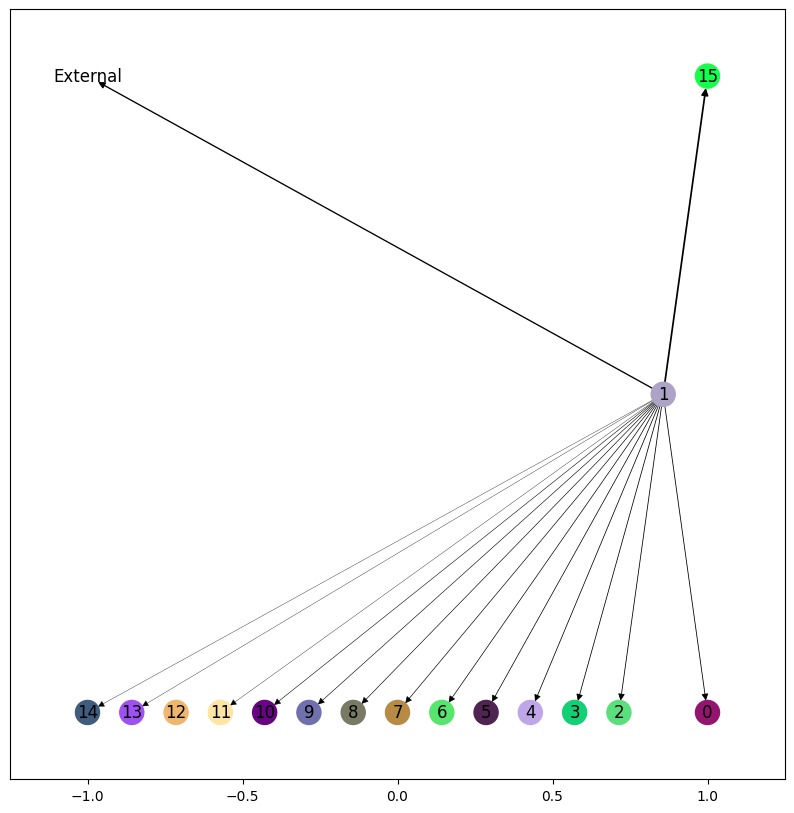

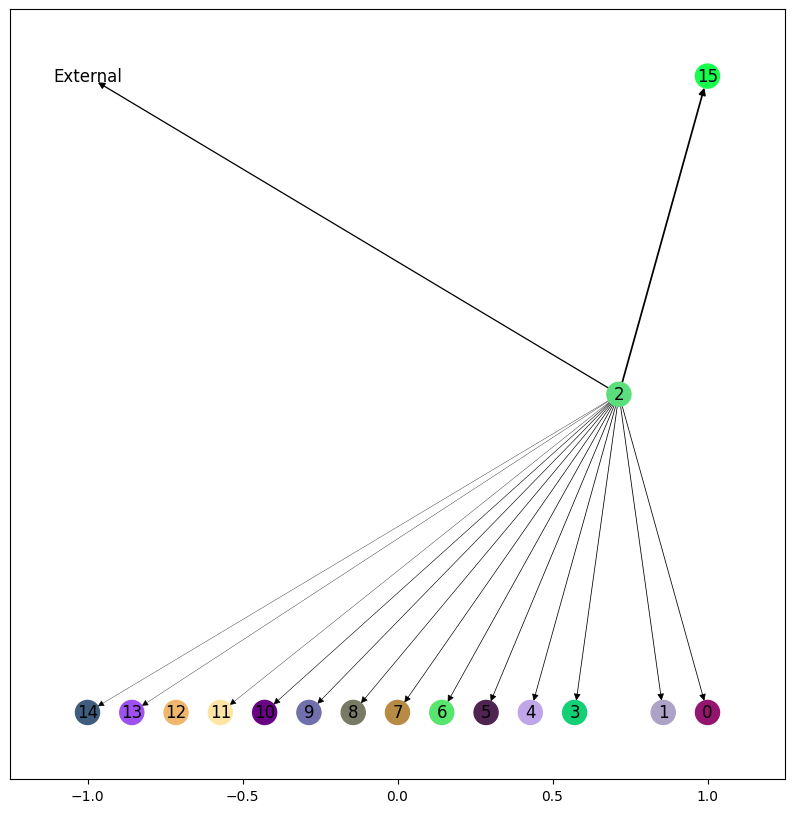

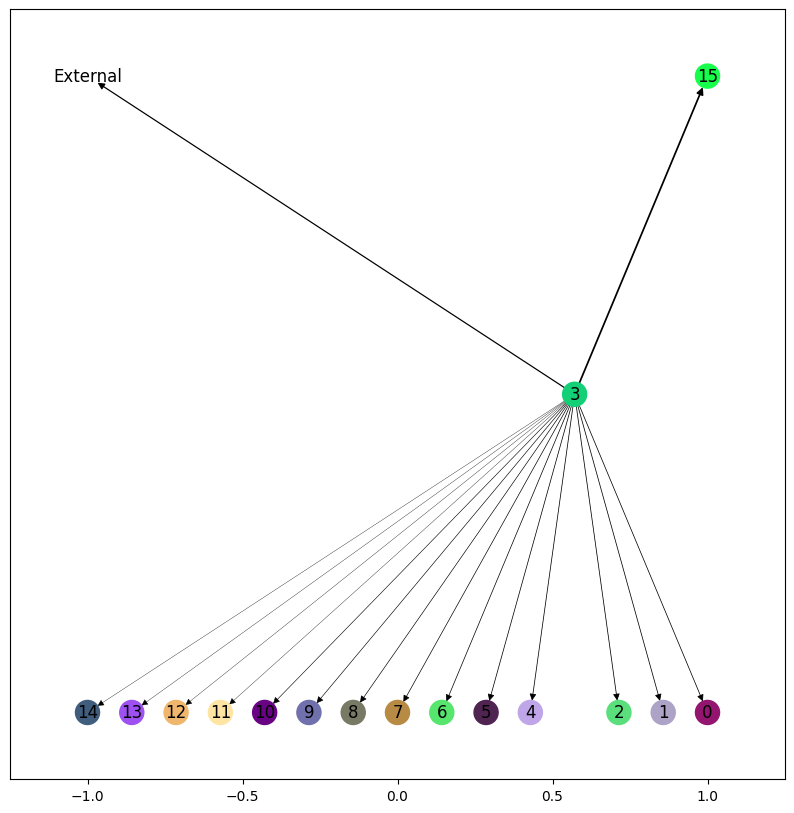

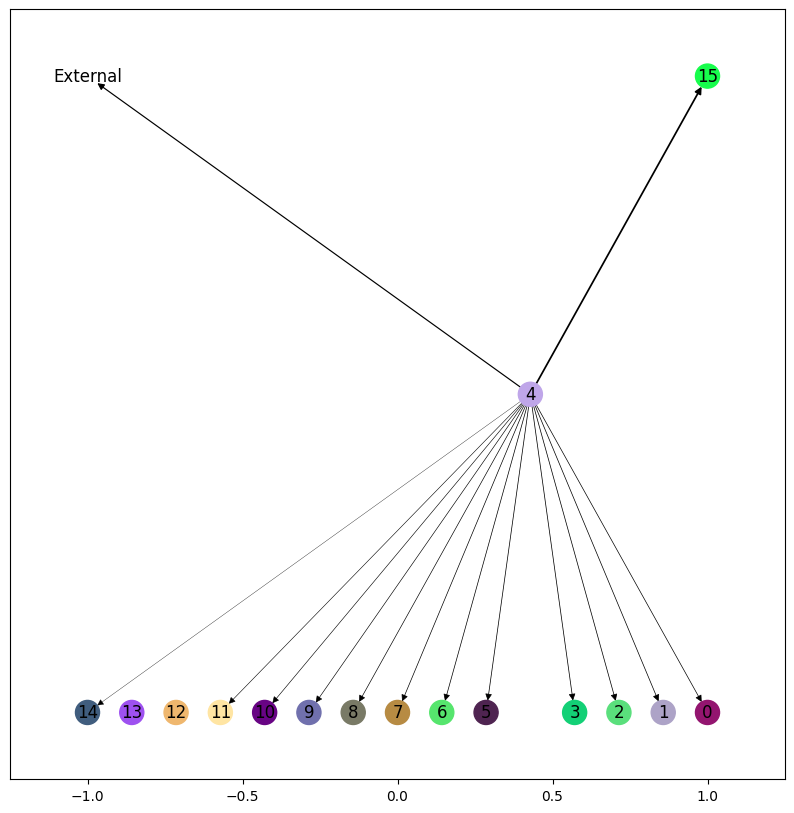

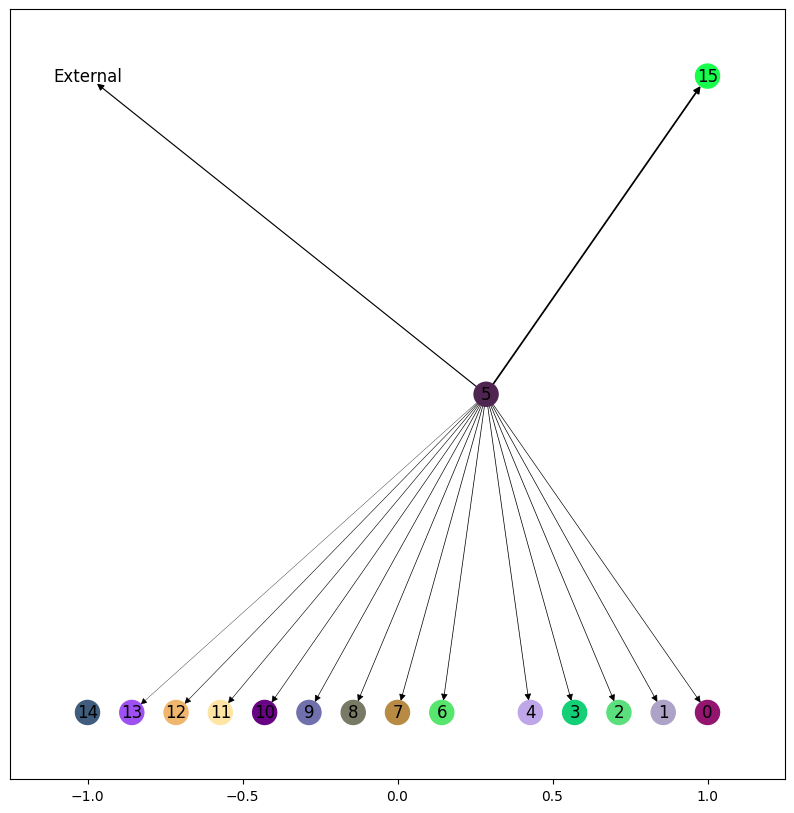

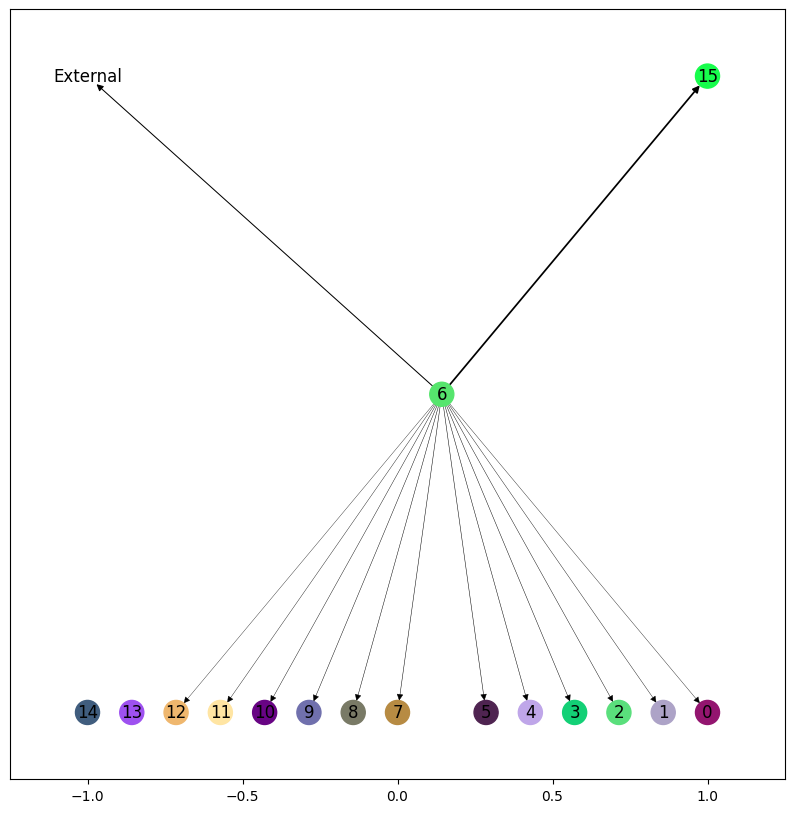

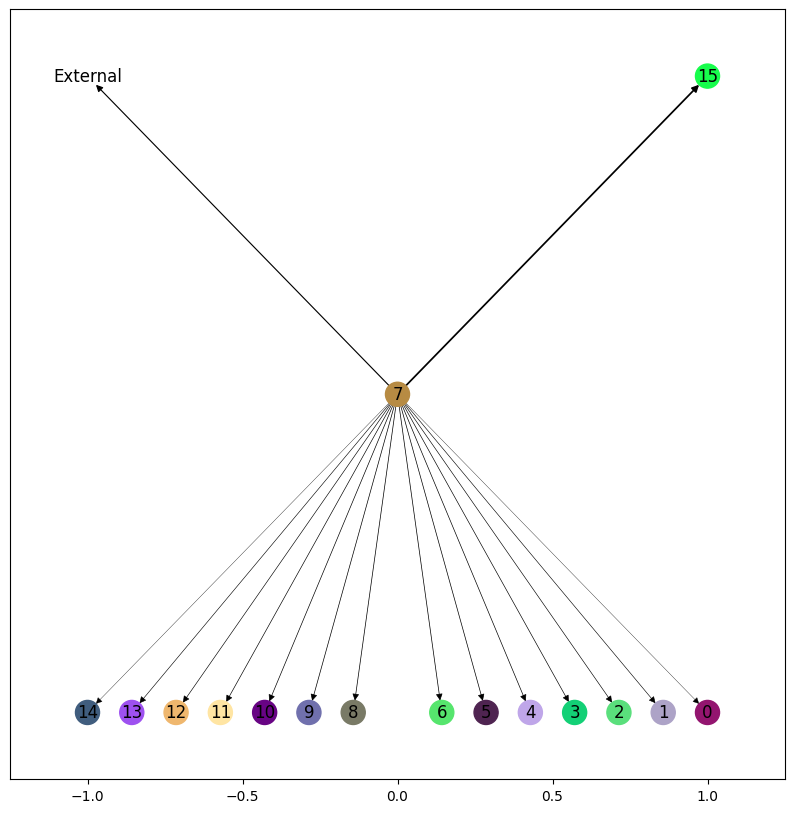

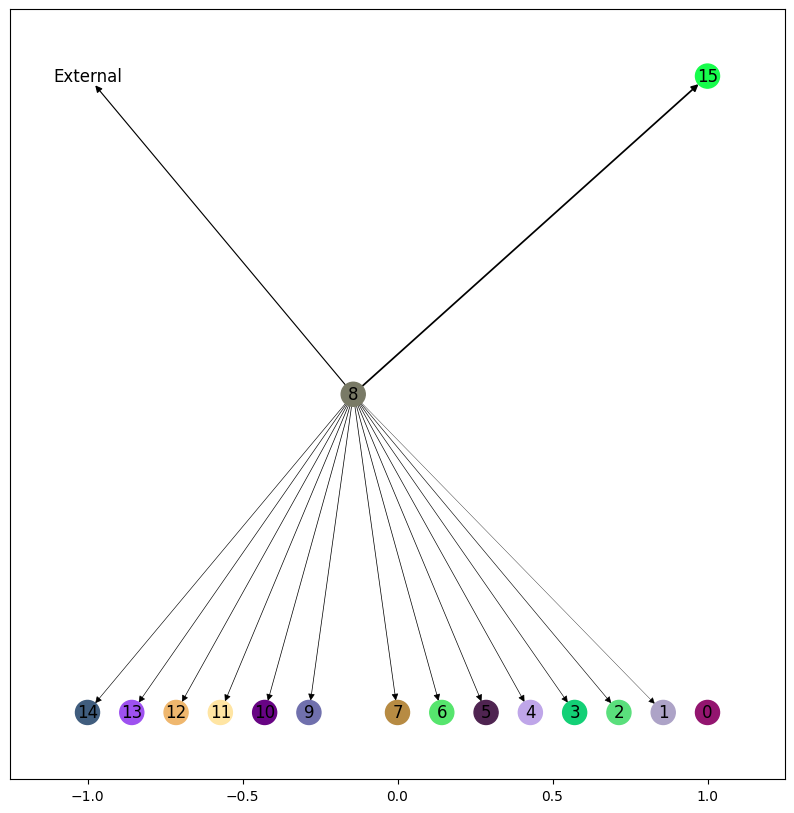

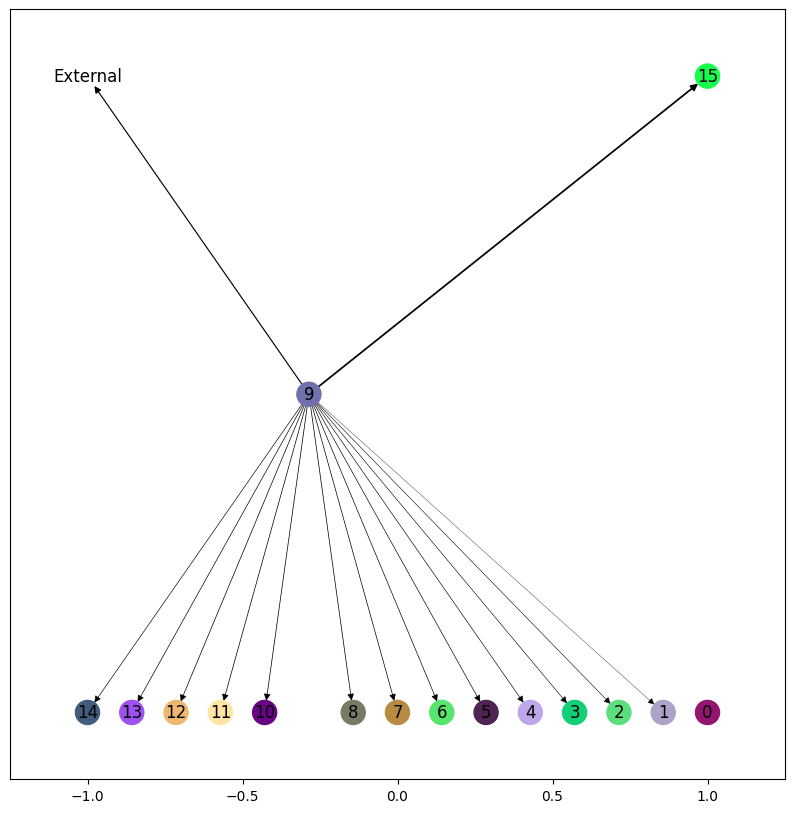

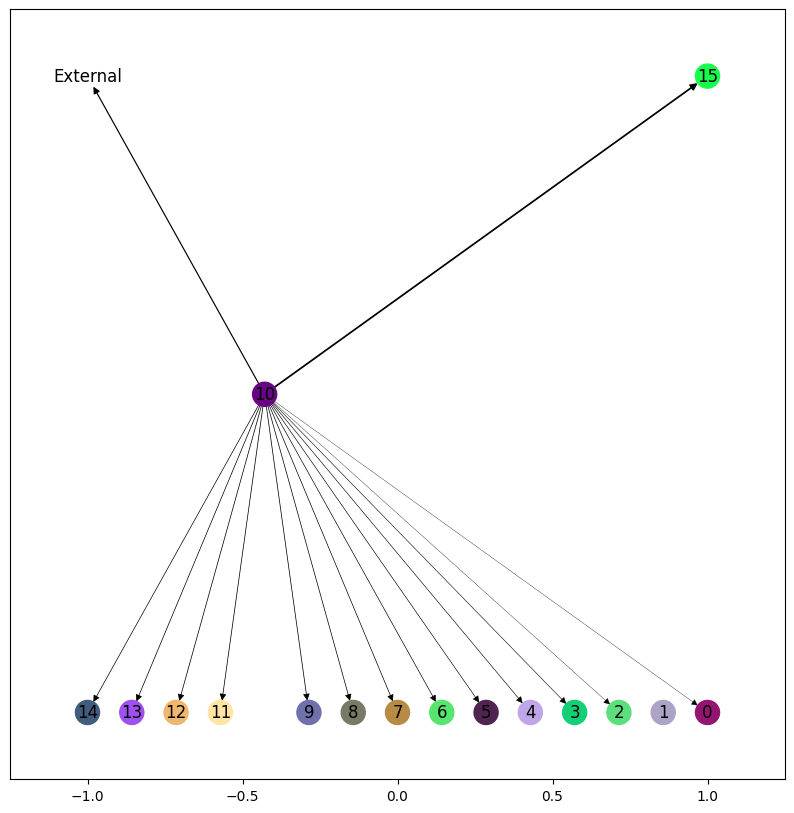

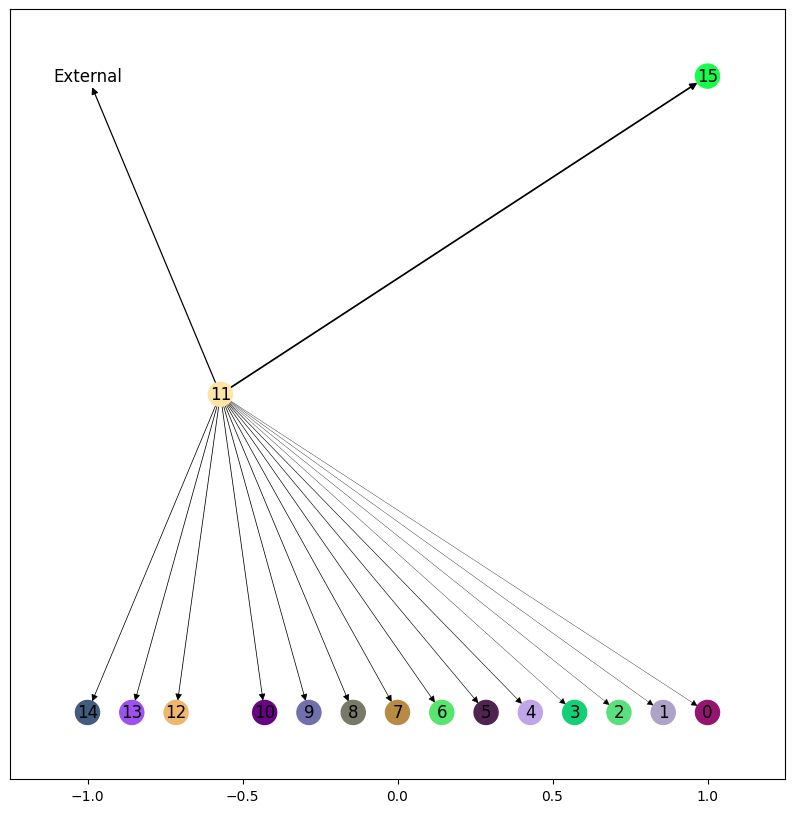

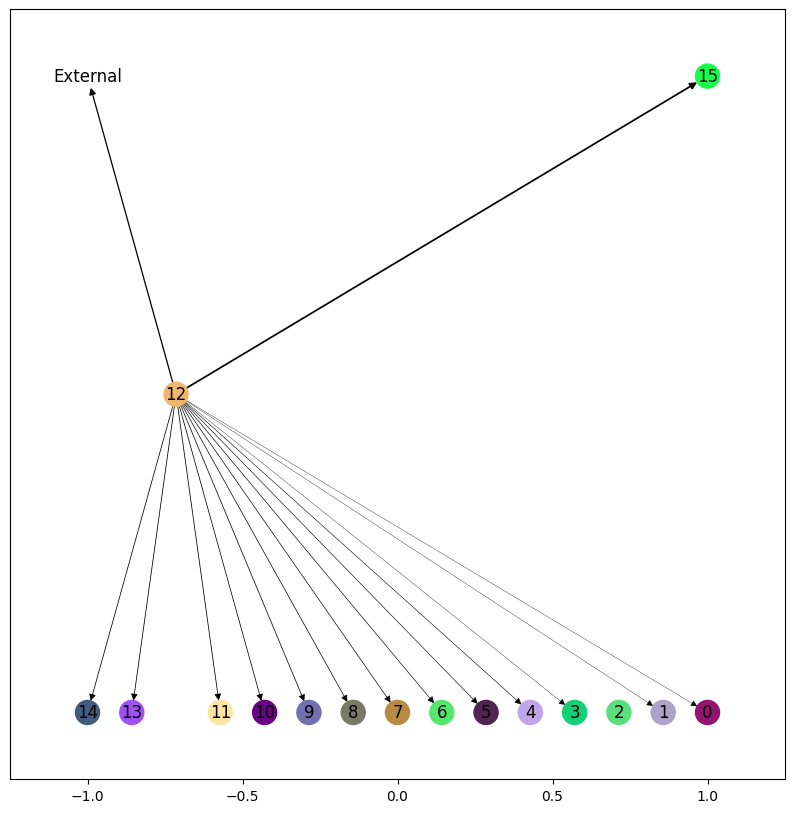

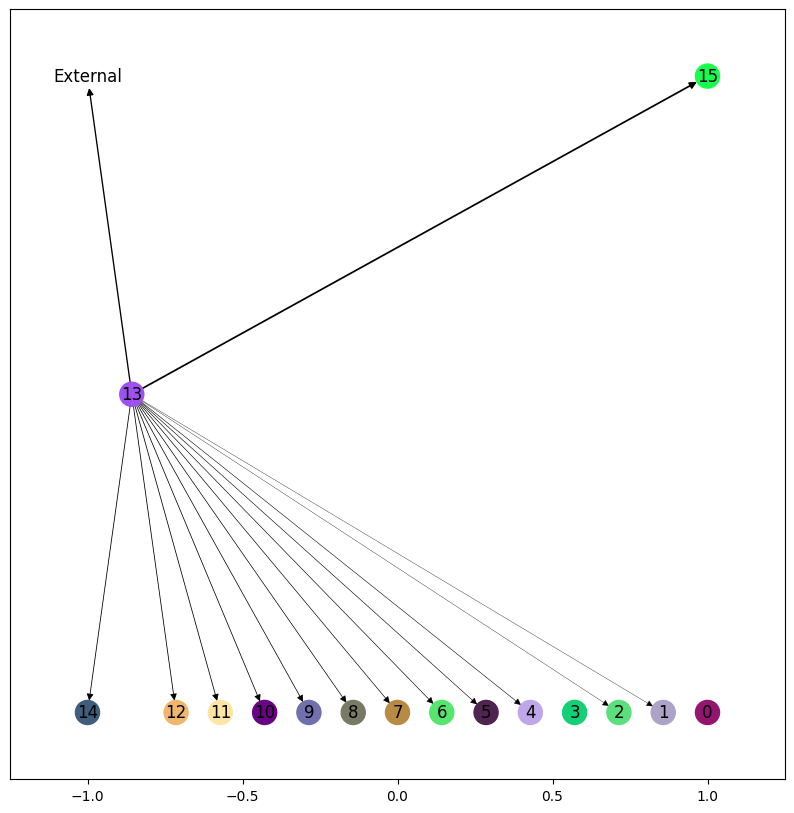

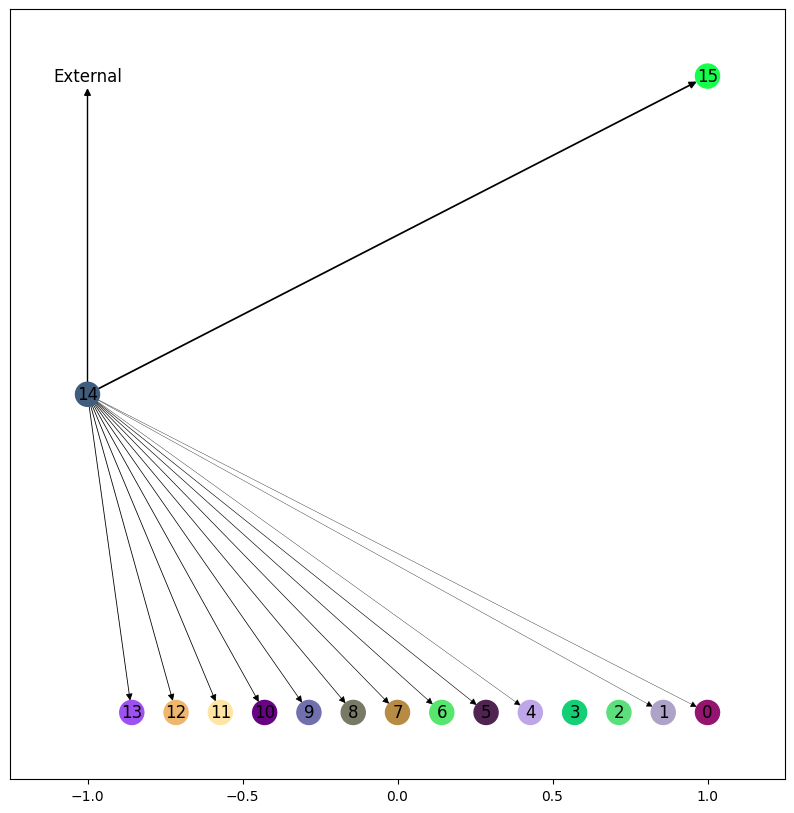

In [39]:
for consumer in content_market.consumers:
    visualize.visualize_consumer(content_market, stats.consumer_stats[consumer.index], agent_colors)

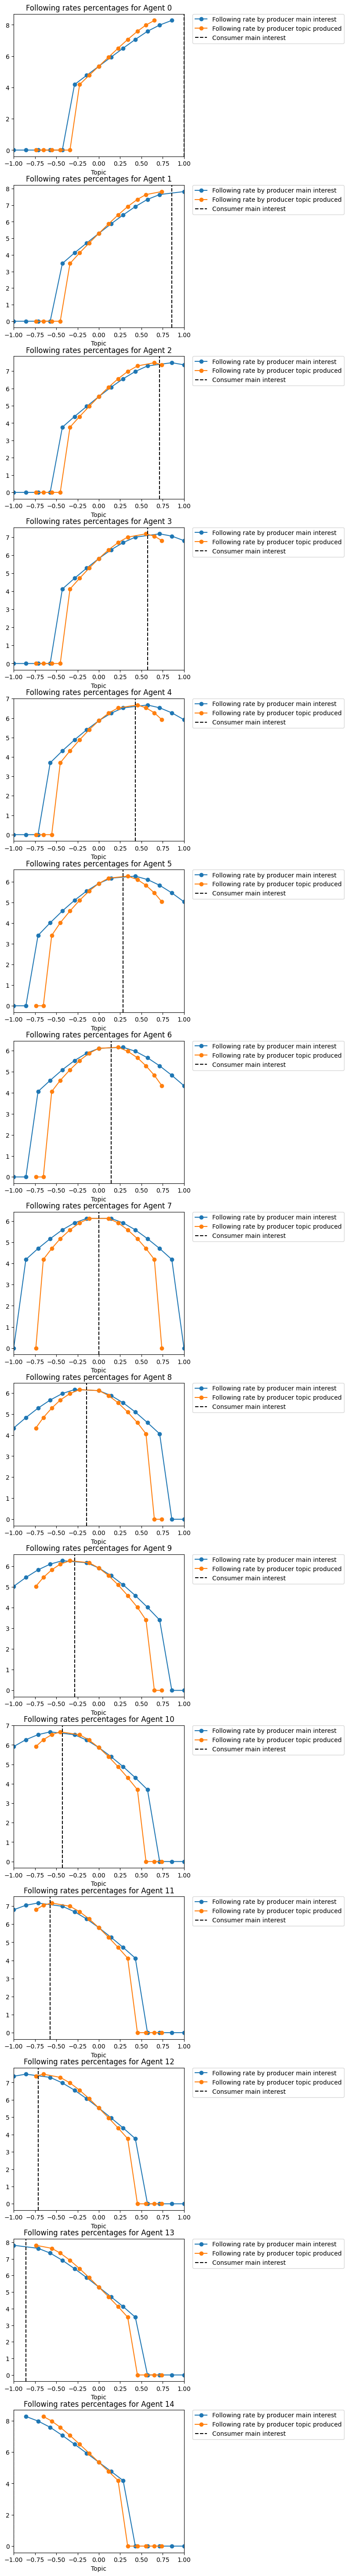

In [40]:
visualize.plot_agent_following_rates(content_market.consumers, stats.consumer_stats, agent_colors)

In [41]:
stats.to_dict()

{'num_iterations': 3,
 'total_consumer_utility': [0,
  164.44092407149046,
  164.70358866274276,
  164.7100394681467],
 'total_producer_utility': [0,
  132.05023020482412,
  132.4670049643322,
  132.47226541064234],
 'total_influencer_utility': [0,
  80.00558232103542,
  80.00563779128477,
  80.025770537182],
 'total_social_welfare': [0,
  164.44092407149046,
  164.70358866274276,
  164.7100394681467],
 'average_consumer_rate_change': [0,
  4.6047686398582535,
  0.2524970594804223,
  0.05665346275849558],
 'average_producer_topic_change': [0,
  0.15069325610635004,
  0.03135200481740223,
  0.003620522128743502],
 'average_influencer_rate_change': [0,
  0.7496319217463018,
  0.23666073346842575,
  0.006464635567088609],
 'average_consumer_utility_change': [0,
  10.962728271432697,
  0.01751097275014975,
  0.00043005369359943777],
 'average_producer_utility_change': [0,
  8.803348680321609,
  0.027784983967205492,
  0.0003506964206777615],
 'average_influencer_utility_change': [0,
  80.0

In [42]:
sorted([c.main_interest for c in content_market.consumers])

[array([-1.]),
 array([-0.85714286]),
 array([-0.71428571]),
 array([-0.57142857]),
 array([-0.42857143]),
 array([-0.28571429]),
 array([-0.14285714]),
 array([0.]),
 array([0.14285714]),
 array([0.28571429]),
 array([0.42857143]),
 array([0.57142857]),
 array([0.71428571]),
 array([0.85714286]),
 array([1.])]